# Representing in 3D

We can find the probability density of an electron at each point in the atomic orbital by taking the square modulus of the wavefunction. The result is a 3D probability distribution. I considered two methods for sampling the distribution: a scatter plot or a plot to display the region in which 90% of the events lie.

After building programs that utilized both methods, I settled on the plot of 90% probability as I think it is simpler to interpret in three dimensions. The output I generated represents the region of 90% probability of finding an electron or pair of electrons. In order to create these plots, having determined my probability distribution function, I created a 30x30x30 3D grid of coordinates, found the probability at each point, and appended the coordinates and their corresponding probabilities to a list.

After the list of coordinates is ordered by descending probability, a while loop works through the list of coordinates and probabilities, adding the probabilities together and appending the coordinates to corresponding x, y and z lists. The loop stops running once the total probability reaches 0.9, or 90%. The regions with displayed points (from the lists of coordinates) therefore represent the position of the electron or pair of electrons 90% of the time. The colour of the points corresponds to the phase of the orbital (dictated by the sign of the radial distribution function) in that region (red is positive, blue is negative). The block of code below outputs plots for 1s, 2s, 2p and 3d orbitals:

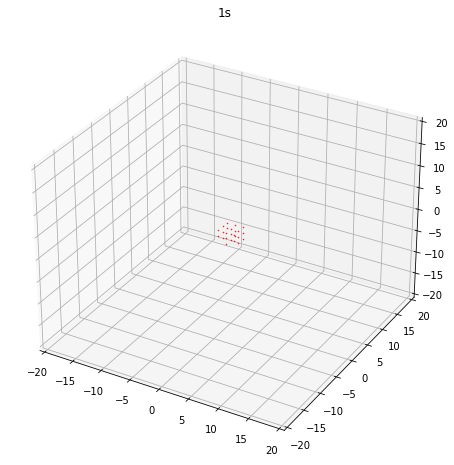

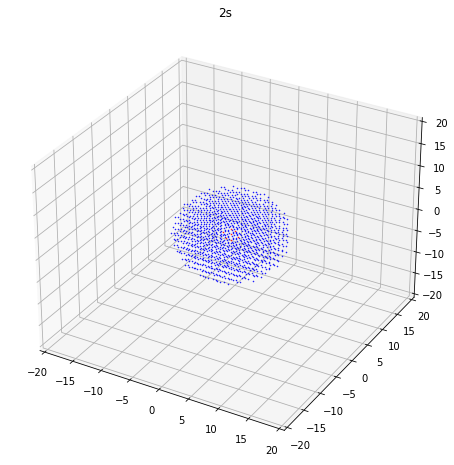

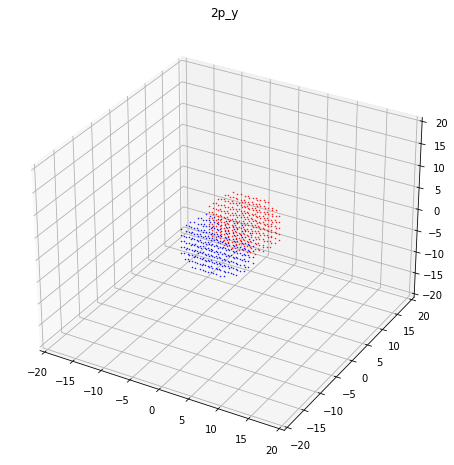

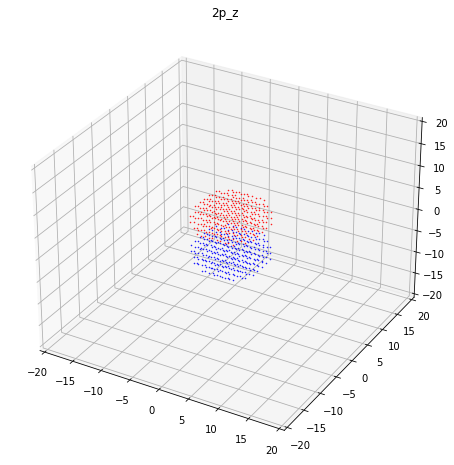

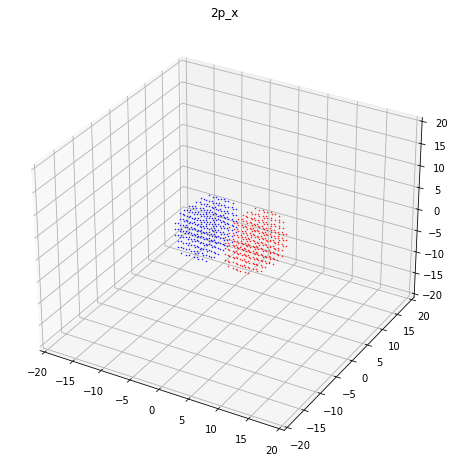

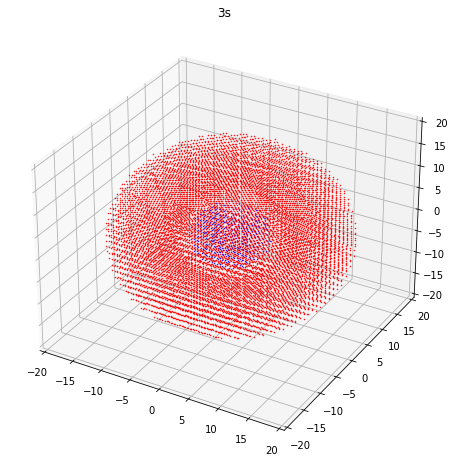

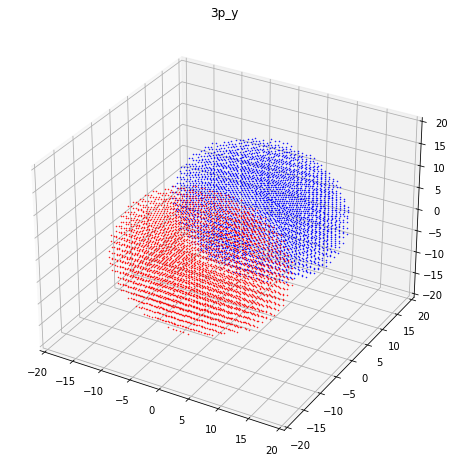

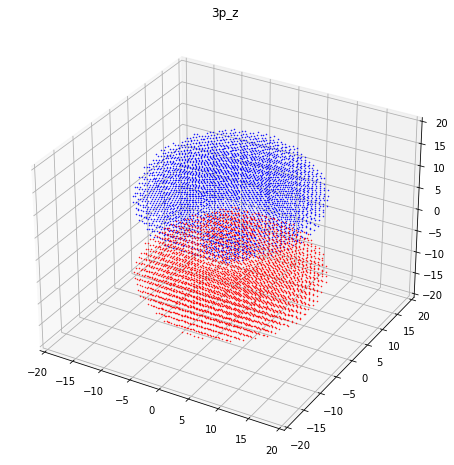

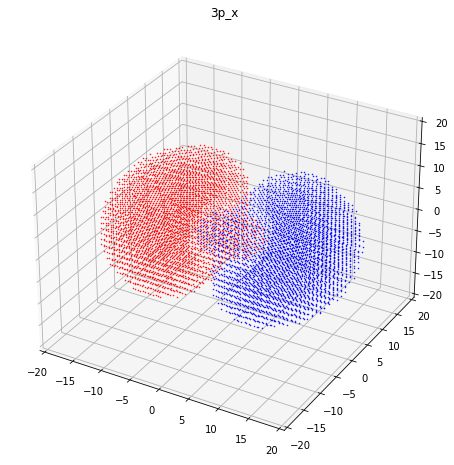

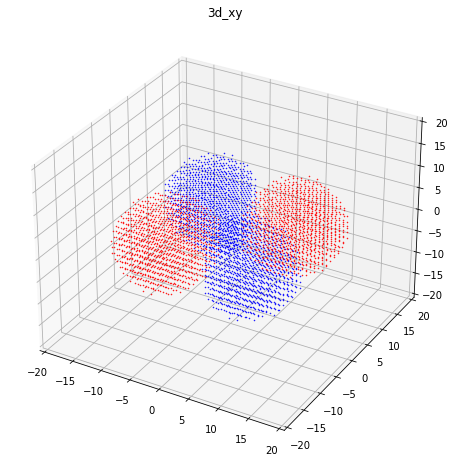

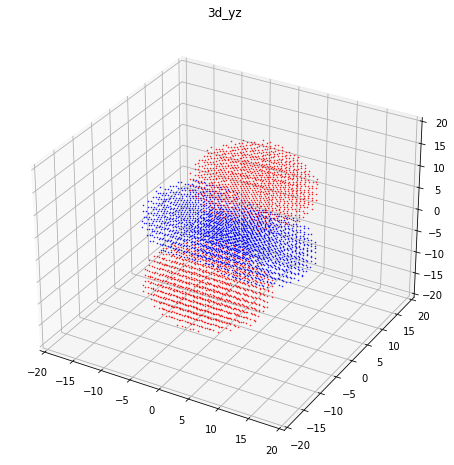

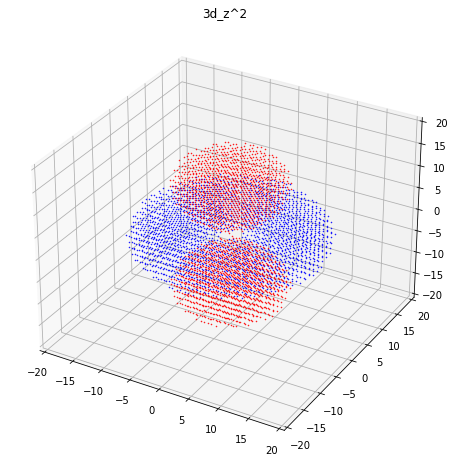

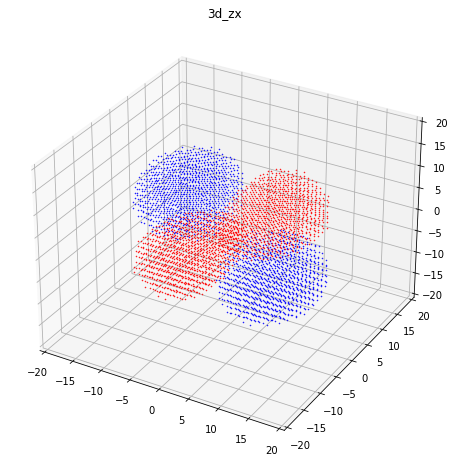

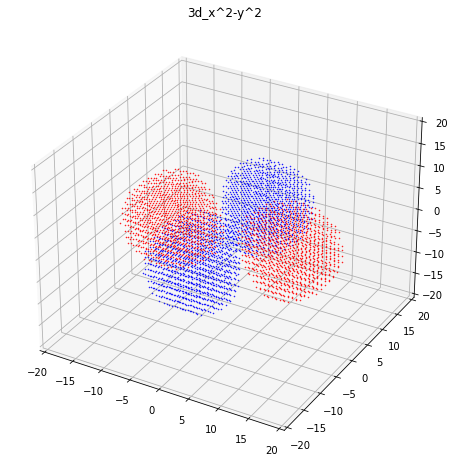

In [83]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
from scipy.special import sph_harm
import math

# Radial Distribution Function
def  radial_wave_function (r, n, l, Z_eff):
    Z = Z_eff     
    p = Z*r
    rho = 0
    if n == 1  and l == 0 :
        return 2*(Z**1.5)*np.exp(-p)
    elif n == 2  and l == 0 :
         return ((Z/2)**1.5)*(2-p)*np.exp(-p/2)
    elif n == 2  and l == 1:
         return (1/(np.sqrt(3))*((Z/2)**1.5)*p*np.exp(-p/2))
    elif n == 3  and l == 0 :
         return (2/27)*((Z/3)**1.5)*(27-18*p+2*(p**2))*np.exp(-p/3)
    elif n == 3 and l == 1 :
         return (1/27)*((2*Z/3)**1.5)*p*(6-p)*np.exp(-p/3)
    elif n == 3  and l == 2 :
         return (4/(27*np.sqrt(10)))*((Z/3)**1.5)*(p**2)*np.exp(-p/3)

        
# The spherical harmonics function stopped working, and I solved by hand instead
def  spherical_harmonics (theta, phi, l, m):
    if l == 0 :
        if m == 0 :
             # l = 0, m = 0 
            return np.sqrt ( 1.0 / ( 4 * np.pi))
    if l == 1 :
         if m == 0 :
             # l = 1, m = 0 
            return np.sqrt ( 3.0 / ( 4.0 * np.pi)) * np.cos ( theta)
         if m == 1 :
             # l = 1, m = + 1 
            return np.sqrt (3.0 / ( 4.0 * np.pi)) * np.sin (theta) * np.cos (phi)
         if m ==- 1 :
             # l = 1, m = + 1 
            return np.sqrt ( 3.0 / ( 4.0 * np.pi)) * np.sin (theta) * np.sin (phi)
    if l == 2 :
         if m == 0 :
            return np.sqrt ( 5.0 / ( 16.0 * np.pi)) * ( 3.0 * (np.cos (theta) ** 2 ) -1.0 )
         if m == 1 :
            return np.sqrt ( 15.0 )/ ( 4.0 * np.pi) * np.cos (theta) * np.sin (theta) * np.cos (phi)
         if m == - 1 :
            return np.sqrt ( 15.0 / ( 4.0 * np.pi )) * np.cos (theta) * np.sin (theta) * np.sin (phi)
         if m == 2 :
            return np.sqrt ( 15.0 / ( 16.0 * np.pi)) * (np.sin ( theta) ** 2 ) * np.cos ( 2 * phi)
         if m == -2 :
            return np.sqrt ( 15.0 / ( 16.0 * np.pi)) * (np.sin (theta) ** 2) * np.sin ( 2 * phi)


def  f (x, y, z, n, l, m, Z_eff): 
    # Convert to polar coordinates 
    r = np.sqrt (x * x + y * y + z * z)
    
    theta = 0.0 
    phi = 0.0 
    if r> 0 :
        theta = np.arccos (z / r)
    if y == 0 :
         if x < 0 :
            phi = np.pi
    elif x * x + y * y> 0 :
        phi = np.sign (y) * np.arccos (x / np.sqrt (x * x + y * y))
        
    # Calculate the product of the radial wave function and the spherical harmonics and output 
    return (radial_wave_function (r, n, l, Z_eff) * spherical_harmonics (theta, phi, l, m))

# Lists for positive data
x_pos_list = []
y_pos_list = []
z_pos_list = []

# Lists for negative data
x_neg_list = []
y_neg_list = []
z_neg_list = []

# Effective nuclear charge of hydrogen
Z =1         
Z_eff = Z            

data = []

N = 30
spread = 20
space = 2*spread/N
prob = 0.0

# List of quantum numbers
numList = [[1,0,0,'1s'],[2,0,0,'2s'],[2,1,-1,'2p_y'],[2,1,0,'2p_z'],[2,1,1,'2p_x'],[3,0,0,'3s'],[3,1,-1,'3p_y'],[3,1,0,'3p_z'],[3,1,1,'3p_x'],[3,2,-2,'3d_xy'],[3,2,-1,'3d_yz'],[3,2,0,'3d_z^2'],[3,2,1,'3d_zx'],[3,2,2,'3d_x^2-y^2']]
# Running the loop for each set of quantum numbers
for d in range (0,len(numList)):
    n = int(numList[d][0])
    l = int(numList[d][1])
    m = int(numList[d][2])
    name = numList[d][3]
    data = []
    prob = 0
    for i in range (N):
        for j in range (N):
            for k in range (N):
                x = i*space-spread
                y = j*space-spread
                z = k*space-spread
                f_1 = f (x, y, z, n, l, m, Z_eff)
                # Probability distribution function
                f_2 = f_1**2
                data.append([f_2,x,y,z,f_1])
                prob = prob+f_2*space**3
    # Ordering the list by descending probability
    data = sorted(data, key =lambda data: data[0], reverse=True)
    total = 0.0
    i = 0
    # Running the loop until the total probability reaches 90%
    while total<0.9*prob:
        x = data[i][1]
        y = data[i][2]
        z = data[i][3]
        total = total+(data[i][0])*space**3
        if data[i][4] >0:
            x_pos_list.append (x)
            y_pos_list.append (y)
            z_pos_list.append (z)
        else:
            x_neg_list.append (x)
            y_neg_list.append (y)
            z_neg_list.append (z) 
        i = i+1


    # Positive values
    Xpos = np.array (x_pos_list)
    Ypos = np.array (y_pos_list)
    Zpos = np.array (z_pos_list)

    # Negative values
    Xneg = np.array (x_neg_list)
    Yneg = np.array (y_neg_list)
    Zneg = np.array (z_neg_list)
    
    # Creating a subplot
    fig = plt.figure (figsize = ( 8.0 , 8.0 ))
    ax = fig.add_subplot ( 1 , 1 , 1 , projection = '3d' )

    x_range = spread
    # Setting limits for the axes
    ax.set_xlim3d (-x_range, x_range)
    ax.set_ylim3d (-x_range, x_range)
    ax.set_zlim3d (-x_range, x_range)
    
    ax.title.set_text("{}".format(name))
    
    # Plot negative values in blue
    ax.plot(Xneg, Yneg, Zneg, color = 'b' , marker = "o", markersize=0.5, linestyle = 'None' )

    # Plot positive values in red
    ax.plot(Xpos, Ypos, Zpos, color = 'r' , marker = "o", markersize=0.5, linestyle = 'None' )
    
    # Resetting the lists
    x_pos_list.clear()
    y_pos_list.clear()
    z_pos_list.clear()
    x_neg_list.clear()
    y_neg_list.clear()
    z_neg_list.clear()
    Xpos = []
    Ypos = []
    Zpos = []
    Xneg = []
    Yneg = []
    Zneg = []
    

plt.show()
